### Ogólne wprowadzenie

###### UWAGA:
Graf może mieć wiele różnych minimalnych drzew spinających, jeżeli ich sumaryczne wagi są takie same.
###### UWAGA:
Algorytm Kruskala wymaga posiadania tablicy krawędzi grafu. Często jest to niewygodne, ponieważ mamy macierz lub listę list, które reprezentują graf, więc lepszym rozwiązaniem może okazać się algorytm Prima. Ponieważ algorytm ten przegląda krawędzie w sposób zależny od ich wag, kolejność krawędzi w tablicy, w której znajdą się krawędzie, należące do MST, nie będzie w żaden sposób skorelowana z kolejnością krawędzi w drzewie. Z tego powodu również trudniej jest odczytać rezultat niż w przypadku algorytmu Prima.

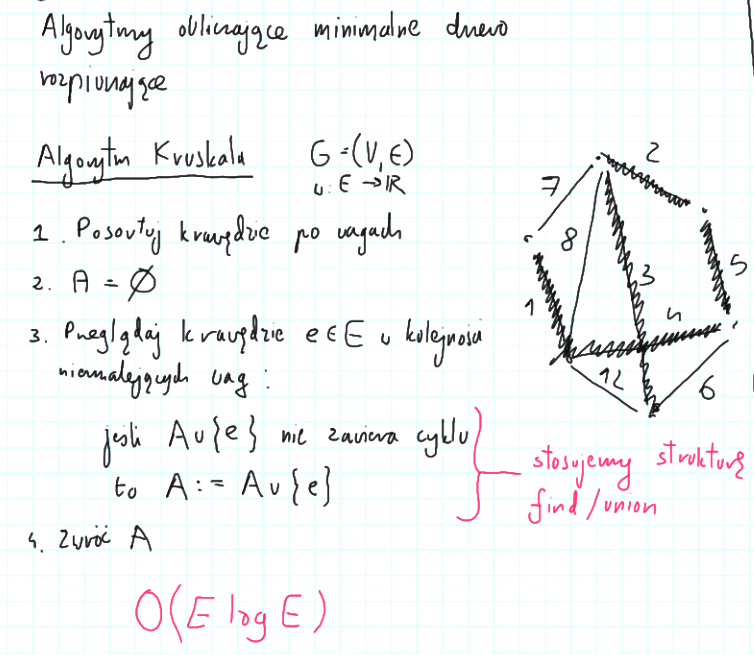

##### Dobry materiał na YouTube:

https://www.youtube.com/watch?v=JZBQLXgSGfs

### Implementacja #1
#### (Z użyciem wbudowanego sortowania)
##### (Dla reprezentacji grafu w postaci listy krawędzi)

#### Uwagi:

Algorytm nie sprawdza, czy graf jest spójny. Zakładamy, że na wejściu otrzymujemy graf: NIESKIEROWANY, SPÓJNY i WAŻONY.

#### Złożoność:

$ O(E \cdot log(E)) $ - sortowanie listy krawędzi w grafie, przy pomocy wbudowanego sortowania, wymaga takiej złożoności. Tak naprawdę $ O(E \cdot log(E)) = O(E \cdot log(V^2)) = O(E \cdot 2 log(V)) = O(E \cdot log(V)) $, z tego powodu w kolejnych algorytmach występuje po prostu oszacowanie złożoności jako $ O(E \cdot log(V)) $.

#### Kod:

In [1]:
class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit
        

def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
    else:
        y.parent = x
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1
            
            
def make_set(x: 'id'):
    return Node(x)


def connected(x: 'id', y: 'id'):
    return find(x) == find(y)


def kruskal(G: '(V, E)'):
    V, E = G
    # Sort all edges by their weights
    E.sort(key=lambda e: e[2])
    # Makeset for each of the vertices
    vert = [make_set(v) for v in V]
    # In a loop pick an edge of the smallest weight
    # and check if we can add this edge to the minimum
    # spanning tree
    result = []
    for edge in E:
        u, v, weight = edge
        if not connected(vert[u], vert[v]):
            union(vert[u], vert[v])
            result.append(edge)
    # Return the resulting array of MST edges
    return result

###### Kilka testów

##### Pomocnicze:

In [2]:
def create_graph(E: 'array of edges'):
    """
    This function creates an array of vertices based on the array of edges
    and returns both, array of vertices and array of edges
    """
    return list(set(map(lambda e: e[0], E)) | set(map(lambda e: e[1], E))), E

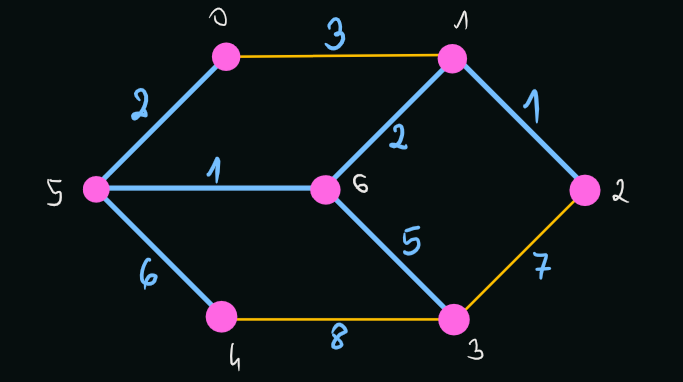

In [3]:
G = create_graph([(5, 0, 2), (0, 1, 3), (1, 2, 1), (5, 6, 1), (1, 6, 2), (5, 4, 6),
                  (4, 3, 8), (3, 6, 5), (2, 3, 7)])

print(kruskal(G))

[(1, 2, 1), (5, 6, 1), (5, 0, 2), (1, 6, 2), (3, 6, 5), (5, 4, 6)]


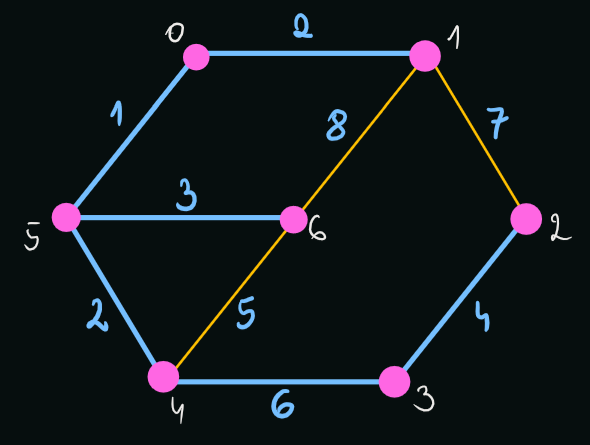

In [4]:
G = create_graph([(0, 5, 1), (0, 1, 2), (1, 2, 7), (5, 6, 3), (6, 1, 8), (5, 4, 2), (4, 6, 5),
                  (4, 3, 6), (3, 2, 4)])

print(kruskal(G))

[(0, 5, 1), (0, 1, 2), (5, 4, 2), (5, 6, 3), (3, 2, 4), (4, 3, 6)]


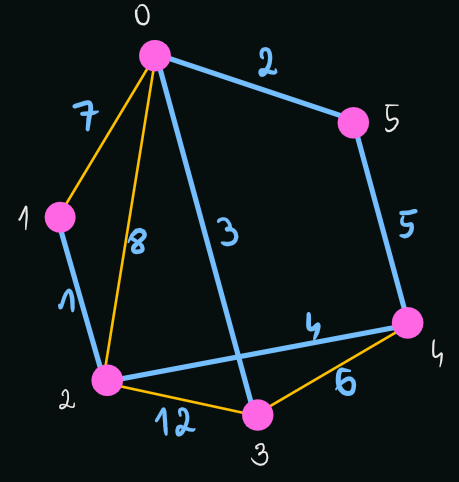

In [5]:
G = create_graph([(0, 1, 7), (1, 2, 1), (2, 3, 12), (3, 4, 6), (4, 5, 5), (0, 5, 2), (0, 3, 3),
                  (0, 2, 8), (2, 4, 4)])

print(kruskal(G))

[(1, 2, 1), (0, 5, 2), (0, 3, 3), (2, 4, 4), (4, 5, 5)]


### Implementacja #2
#### (Z użyciem Radix Sorta)
##### (Dla reprezentacji grafu w postaci listy krawędzi)

#### Uwagi:

Algorytm nie sprawdza, czy graf jest spójny. Zakładamy, że na wejściu otrzymujemy graf: NIESKIEROWANY, SPÓJNY i WAŻONY. <br>
Radix Sort umożliwia sortowanie krawędzi jedynie o całkowitoliczbowych wagach. Poniższa implementacja Radix Sorta pozwala jednak na zastosowanie ujemnych wag krawędzi, ale będących jedynie liczbami całkowitymi. Radix Sort nie jest dobrym rozwiązaniem, gdy liczby (wagi) posiadają bardzo dużo znaków, bo jego złożoność zależy od liczby znaków w sortowanych liczbach. W ogólności możemy przyjąć, że gdy znamy górne ograniczenie na wartości wag, Radix Sort działa w czasie $ O(n) $.

#### Złożoność:

Taka jak w algorytmie Find Union (Union Find), omówionym w osobnym pliku. Przyjmujemy, że złożoność sortowania jest liniowa względem liczby krawędzi $ O(E) $ (a więc wynosi mniej od złożoności Union Find), więc złożoność algorytmu będzie taka, jak złożoność algorytmu Union Find, czyli praktycznie liniowa, a teoretycznie taka jak poniżej (lub dokładniej - ograniczona przez funkcję Ackermanna). <br>
$ O(E \cdot log^*(V)) $ - wykonujemy $ E $ operacji - dla każdej krawędzi wywołujemy $ find $ oraz dla części robimy $ union $, z czego $ V $ operacji to makeset, bo dla $ V $ wierzchołków tworzymy zbiory.

#### Kod:

In [6]:
def radix_sort(arr, *, fn=lambda x: x, base=10):
    if len(arr) > 1:
        first_non_negative_idx, min_negative, max_positive = _partition(arr, fn)
        # If not all the numbers are positive (there are some negative integers)
        if first_non_negative_idx > 0:
            _radix_sort(arr, 0, first_non_negative_idx - 1, min_negative, base, fn)
        # If not all the numbers are negative (there are some positive integers)
        if first_non_negative_idx < len(arr):
            _radix_sort(arr, first_non_negative_idx, len(arr) - 1, max_positive, base, fn)
            
            
def _radix_sort(arr, begin_idx, end_idx, limit, base, fn):
    digit_place = 1
    limit = abs(limit)
    while limit >= digit_place:
        _counting_sort(arr, begin_idx, end_idx, digit_place, base, fn)
        digit_place *= base
            
# This function moves negative elements to the left and positive ones to the right side
# of an array. Time complexity is only O(n) as it uses approach similar to the Quick Sort
# Lomuto's partition with the pivot set to -1 as it partitions an array into a part of values 
# lower than or equal to a pivot and values greater than a pivot
def _partition(arr, fn):
    pivot = -1
    max_val = fn(arr[0])
    # If there is no negative number, we will still return -1 value (this value is used only
    # to store the lowest number (if there are negative numbers))
    min_val = -1

    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater than a pivot
    i = 0
    for j in range(len(arr)):
        if fn(arr[j]) <= pivot:
            if fn(arr[j]) < min_val:
                min_val = fn(arr[j])
            _swap(arr, i, j)
            i += 1
        elif fn(arr[j]) > max_val:
            max_val = fn(arr[j])

    return i, min_val, max_val

        
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]


def _counting_sort(arr, begin_idx, end_idx, digit_place, base, fn):
    # Allocate memory for required temporary arrays
    counts = [0] * base
    result = [None] * (end_idx - begin_idx + 1)
    # Count digits repetitions
    for i in range(begin_idx, end_idx + 1):
        digit = (fn(arr[i]) // digit_place) % base
        counts[digit] += 1
    # Modify the counts array to indicate how many digits are not greater than the current one
    for i in range(1, base):
        counts[i] += counts[i - 1]
    # Rewrite values to the result sorted array
    for i in range(end_idx, begin_idx - 1, -1):
        digit = (fn(arr[i]) // digit_place) % base
        counts[digit] -= 1
        result[counts[digit]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(result)):
        arr[begin_idx + i] = result[i]
        
        
class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit
        

def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
    else:
        y.parent = x
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1
            
            
def make_set(x: 'id'):
    return Node(x)


def connected(x: 'id', y: 'id'):
    return find(x) == find(y)


def kruskal(G: '(V, E)'):
    V, E = G
    # Sort all edges by their weights
    radix_sort(E, fn=lambda edge: edge[2])
    # Makeset for each of the vertices
    vert = [make_set(v) for v in V]
    # In a loop pick an edge of the smallest weight
    # and check if we can add this edge to the minimum
    # spanning tree
    result = []
    for edge in E:
        u, v, weight = edge
        if not connected(vert[u], vert[v]):
            union(vert[u], vert[v])
            result.append(edge)
    # Return the resulting array of MST edges
    return result

###### Kilka testów

##### Pomocnicze:

In [7]:
def create_graph(E: 'array of edges'):
    """
    This function creates an array of vertices based on the array of edges
    and returns both, array of vertices and array of edges
    """
    return list(set(map(lambda e: e[0], E)) | set(map(lambda e: e[1], E))), E

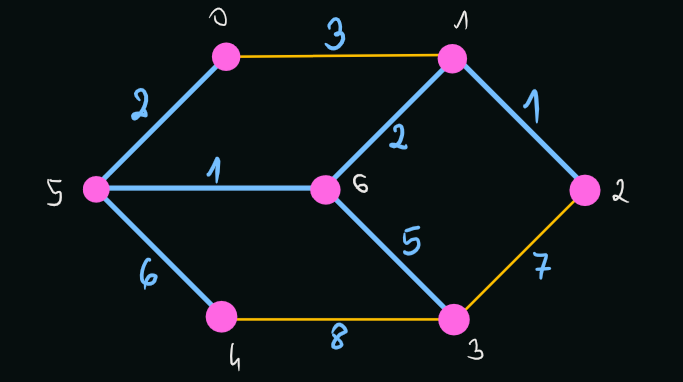

In [8]:
G = create_graph([(5, 0, 2), (0, 1, 3), (1, 2, 1), (5, 6, 1), (1, 6, 2), (5, 4, 6),
                  (4, 3, 8), (3, 6, 5), (2, 3, 7)])

print(kruskal(G))

[(1, 2, 1), (5, 6, 1), (5, 0, 2), (1, 6, 2), (3, 6, 5), (5, 4, 6)]


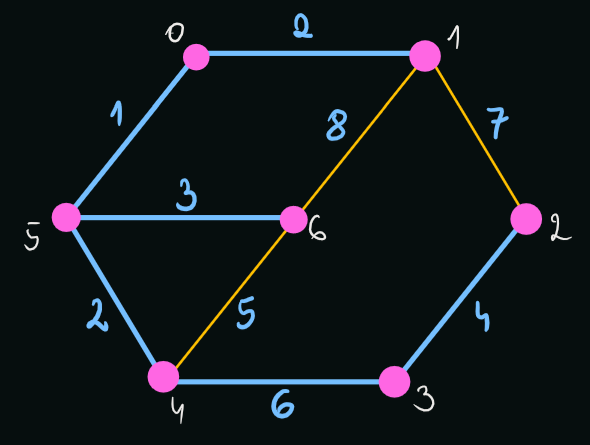

In [9]:
G = create_graph([(0, 5, 1), (0, 1, 2), (1, 2, 7), (5, 6, 3), (6, 1, 8), (5, 4, 2), (4, 6, 5),
                  (4, 3, 6), (3, 2, 4)])

print(kruskal(G))

[(0, 5, 1), (0, 1, 2), (5, 4, 2), (5, 6, 3), (3, 2, 4), (4, 3, 6)]


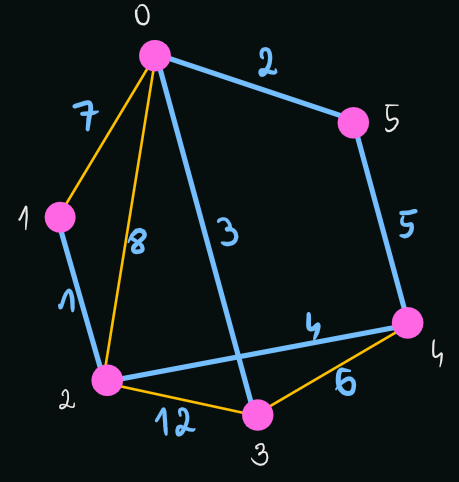

In [10]:
G = create_graph([(0, 1, 7), (1, 2, 1), (2, 3, 12), (3, 4, 6), (4, 5, 5), (0, 5, 2), (0, 3, 3),
                  (0, 2, 8), (2, 4, 4)])

print(kruskal(G))

[(1, 2, 1), (0, 5, 2), (0, 3, 3), (2, 4, 4), (4, 5, 5)]


### Implementacja #3
##### (Dla reprezentacji grafu, przy pomocy list sąsiedztwa)

#### Uwagi:

Wszystko jak wyżej oraz to, że musimy utworzyć tablicę krawędzi. Konieczne jest później skorzystanie z jednej z powyższych implementacji algorytmu (poniżej nie umieszczam ich ponownie).

#### Złożoność:

Tak jak w poprzednich algorytmach, bo złożoność potrzebna na przejście grafu jest liniowa, a więc mniejsza od złożoności algorytmu Kruskala ($ O(V + E) \lt O(E \cdot log(E)) $ oraz $ O(V + E) \lt O(E \cdot log^*(V)) $).

#### Kod:

In [11]:
def graph_VE(G: 'graph represented using adjacency lists'):
    n = len(G)
    E = []
    V = list(range(n))
    
    for u in range(n):
        for v, weight in G[u]:
            # Avoid repetitions
            if v <= u: continue
            E.append((u, v, weight))
            
    return V, E

###### Kilka testów

##### Pomocnicze:

In [12]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

##### Testy:

In [13]:
E = [(0, 1, 7), (1, 2, 1), (2, 3, 12), (3, 4, 6), (4, 5, 5), (0, 5, 2), (0, 3, 3), (0, 2, 8), (2, 4, 4)]
G = undirected_weighted_graph_list(E)
V, E2 = graph_VE(G)
print(V, E2)
print('Is ok?', sorted(E2) == sorted(E))

[0, 1, 2, 3, 4, 5] [(0, 1, 7), (0, 5, 2), (0, 3, 3), (0, 2, 8), (1, 2, 1), (2, 3, 12), (2, 4, 4), (3, 4, 6), (4, 5, 5)]
Is ok? True


### Implementacja #4
##### (Dla reprezentacji grafu, przy pomocy macierzy)

#### Uwagi:

Wszystko jak wyżej oraz to, że musimy utworzyć tablicę krawędzi. Konieczne jest później skorzystanie z jednej z powyższych implementacji algorytmu (poniżej nie umieszczam ich ponownie).

#### Złożoność:

Zależy od tego, czy graf jest rzadki, czy gęsty. Dla grafów rzadkich zazwyczaj złożoność jest gorsza niż złożoność samego algorytmu Kruskala, dla gęstych nie ma to wielkiego znaczenia.

#### Kod:

In [14]:
def graph_VE(G: 'graph represented using adjacency matrix'):
    n = len(G)
    E = []
    V = list(range(n))
    
    for u in range(n):
        for v in range(u + 1, n):  # We want to avoid repetitions
            # I assume that weight 0 means there is no edge
            if not G[u][v]: continue
            E.append((u, v, G[u][v]))
                
    return V, E

###### Kilka testów

##### Pomocnicze:

In [15]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph (0 means no edge)
    G = [[0] * n for _ in range(n)]
    for e in E:
        G[e[0]][e[1]] = G[e[1]][e[0]] = e[2]
    return G

##### Testy:

In [16]:
E = [(0, 1, 7), (1, 2, 1), (2, 3, 12), (3, 4, 6), (4, 5, 5), (0, 5, 2), (0, 3, 3), (0, 2, 8), (2, 4, 4)]
G = undirected_weighted_graph_matrix(E)
V, E2 = graph_VE(G)
print(V, E2)
print('Is ok?', sorted(E2) == sorted(E))

[0, 1, 2, 3, 4, 5] [(0, 1, 7), (0, 2, 8), (0, 3, 3), (0, 5, 2), (1, 2, 1), (2, 3, 12), (2, 4, 4), (3, 4, 6), (4, 5, 5)]
Is ok? True
